<h1 style = "text-align: center; color: green;"><b>Electronic Gadget Sales Analysis</b></h1><br>By Obumneme Nkeanyadi

### [Problem Statement](trygfs)

B-Lord Group is seeking to find the sales activities and performance in the phone and accessories<br>
department of B-Lord Group. Find the yearly sales trend, the average, and return in one year period<br>
the product with the highest order by country or city, respective KPIs, and other relevant insights.

In [42]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Load the datasets into a list
data = ['Sales_April_2019.csv',
        'Sales_August_2019.csv',
        'Sales_December_2019.csv',
        'Sales_February_2019.csv',
        'Sales_January_2019.csv',
        'Sales_July_2019.csv',
        'Sales_June_2019.csv',
        'Sales_March_2019.csv',
        'Sales_May_2019.csv',
        'Sales_November_2019.csv',
        'Sales_October_2019.csv',
        'Sales_September_2019.csv']

In [44]:
# count the total number of files
print('Num of Files:', len(data))

Num of Files: 12


In [45]:
# Use pandas to read the loaded data by looping
dt = [pd.read_csv(d) for d in data] 
# concat the files 
df = pd.concat(dt)
# Check the df or data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [46]:
# check the total shape
df.shape

(186850, 6)

# `Data Preprocessing & Cleaning`

In [47]:
# Check for general information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [48]:
# Check for missing values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [49]:
# Drop or remove missing values
df.dropna(how='all',inplace=True)

In [50]:
# Check for duplicates
df.duplicated().sum()

618

In [51]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [52]:
# Convert numeric columns to int and/or float
# filter the rows with headers
df = df[df['Quantity Ordered'].str.isdigit()] # remove rows where header is repeated
# Convert to int
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
# check to confirm
df['Quantity Ordered'].dtype

dtype('int32')

In [53]:
# Convert numeric columns to int and/or float
# filter the rows with headers
df = df[df['Price Each'].str.isdigit()] # remove rows where header is repeated
# Convert to int
df['Price Each'] = df['Price Each'].astype('float')
# check to confirm
df['Price Each'].dtype

dtype('float64')

In [54]:
# Convert numeric columns to int and/or float
# filter the rows with headers
df = df[df['Order ID'].str.isdigit()] # remove rows where header is repeated
# Convert to int
df['Order ID'] = df['Order ID'].astype('int')
# check to confirm
df['Order ID'].dtype

dtype('int32')

In [55]:
# Convert order date to python datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
import warnings
warnings.filterwarnings("ignore")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39244 entries, 3 to 11683
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          39244 non-null  int32         
 1   Product           39244 non-null  object        
 2   Quantity Ordered  39244 non-null  int32         
 3   Price Each        39244 non-null  float64       
 4   Order Date        39244 non-null  datetime64[ns]
 5   Purchase Address  39244 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 1.8+ MB


`Add New Column for Analysis`

In [57]:
# create a new column and extract month from Order Date 
df['Month'] = df['Order Date'].dt.month_name()
# Check the updated dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April


In [58]:
# Create a new column and extract day from Order Date
df['Day'] = df['Order Date'].dt.day_name()
# Check the updated dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday


In [59]:
# Create a new column and extract time from Order Date
df['Time'] = df['Order Date'].dt.time
# Check the updated dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Time
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,14:38:00
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday,10:38:00
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday,17:18:00
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday,20:30:00
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,19:42:00


In [60]:
# Create a new column for amount
df['Amount'] = (df['Quantity Ordered'] * df['Price Each']).round(2)
# Check the updated dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Time,Amount
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,14:38:00,600.0
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday,10:38:00,1700.0
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday,17:18:00,600.0
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday,20:30:00,150.0
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,19:42:00,600.0


In [61]:
# Create a new column and extract city from purchase address
df['City'] = df['Purchase Address'].apply(lambda City: City.split(',')[-2])
# Check the updated dataFrame
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Time,Amount,City
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,14:38:00,600.0,Los Angeles
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday,10:38:00,1700.0,San Francisco
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday,17:18:00,600.0,Los Angeles
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday,20:30:00,150.0,New York City
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,19:42:00,600.0,Los Angeles


`Monthly Sales Trend`

In [62]:
# group by amount by month
mon = df.groupby('Month')['Amount'].sum()
mon 

Month
April        2058150.0
August       1316550.0
December     2779750.0
February     1301550.0
January      1103150.0
July         1584100.0
June         1535350.0
March        1674150.0
May          1918450.0
November     1938150.0
October      2215100.0
September    1225550.0
Name: Amount, dtype: float64

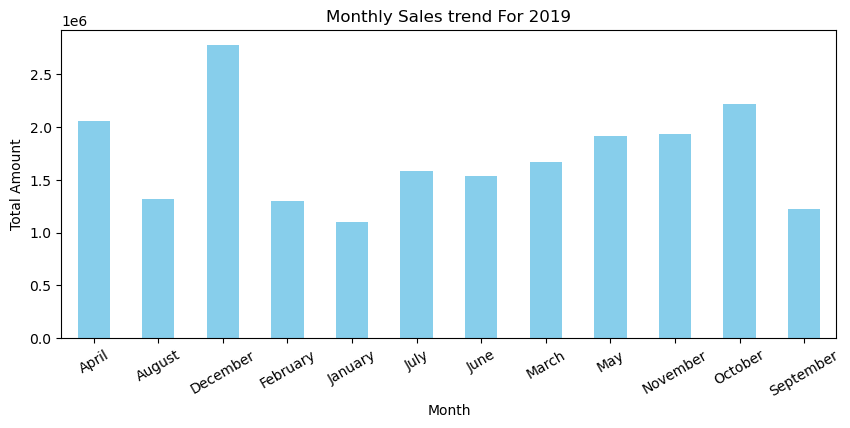

In [63]:
# Visualize the trend
plt.figure(figsize=(10,4))
mon.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales trend For 2019')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=30)
plt.show()


`Weekly Sales Trend`

In [64]:
# group by amount by day of the week
weekly = df.groupby('Day')['Amount'].sum()
weekly

Day
Friday       2903750.0
Monday       2958100.0
Saturday     2929000.0
Sunday       2954850.0
Thursday     2857350.0
Tuesday      3100700.0
Wednesday    2946250.0
Name: Amount, dtype: float64

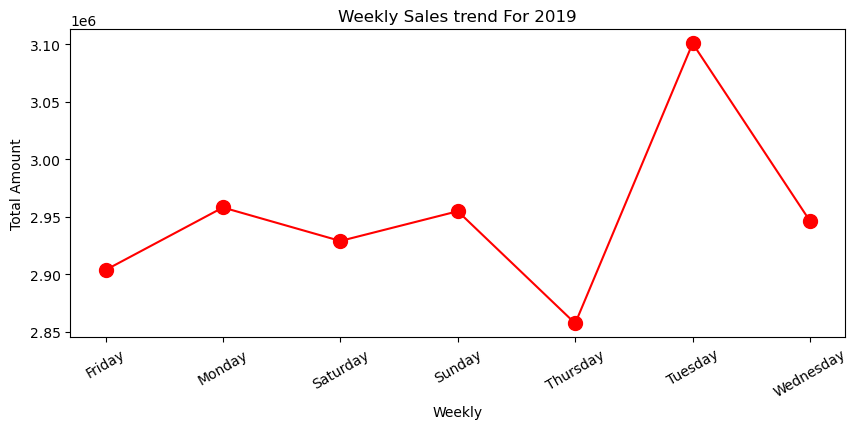

In [65]:
# Visualize the trend
plt.figure(figsize=(10,4))
weekly.plot(kind='line', color='red', marker='o', markersize='10')
plt.title('Weekly Sales trend For 2019')
plt.xlabel('Weekly')
plt.ylabel('Total Amount')
plt.xticks(rotation=30)
plt.show()


`Product Sales Performance by total Orders and Amount`

In [66]:
# product perf
# groupby average aggregate
per = df.groupby('Product') [['Amount', 'Quantity Ordered']].sum().sort_values(by= 'Quantity Ordered', ascending=False)
per

,Amount,Quantity Ordered
Product,,
Apple Airpods Headphones,2330700.0,15538
iPhone,4766300.0,6809
Google Phone,3296400.0,5494
Flatscreen TV,1437900.0,4793
Macbook Pro Laptop,7995100.0,4703
Vareebadd Phone,823600.0,2059


<Figure size 1000x400 with 0 Axes>

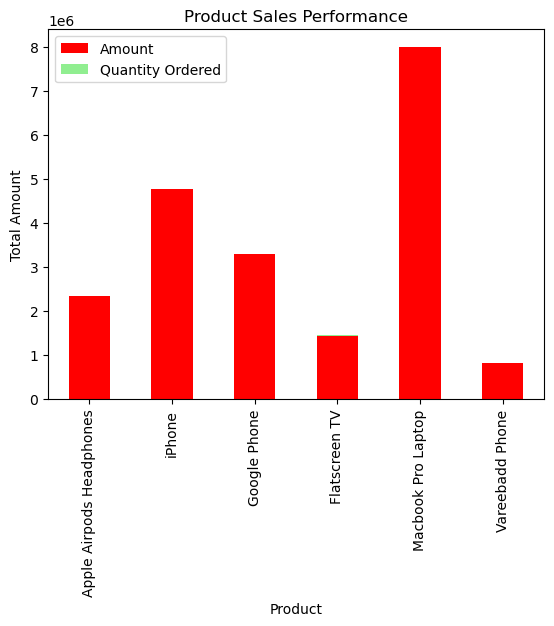

In [67]:
# Visualize the chart
# Visualize the trend
plt.figure(figsize=(10,4))
per.plot(kind='bar', color=['red', 'lightgreen'], stacked=True)
plt.title('Product Sales Performance')
plt.xlabel('Product')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()


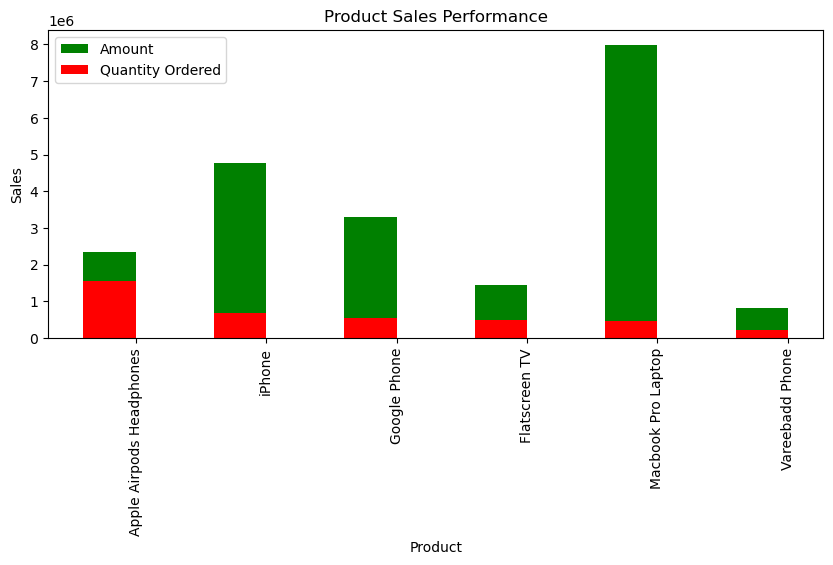

In [77]:
# Get data for plotting
categories = per.index
# Set bar position
x = np.arange(len(categories))
width = 0.4
# Create fig and plot side by side
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x - width/2, per["Amount"], width, label="Amount", color='green')
ax.bar(x - width/2, per['Quantity Ordered']*100, width, label='Quantity Ordered', color='red')
# Customize the plot
ax.set_xlabel('Product')
ax.set_ylabel('Sales')
ax.set_title('Product Sales Performance')
ax.set_xticks(x)
ax.legend()
ax.set_xticklabels(categories, rotation=90)
plt.show()

In [ ]:
# product perf
# groupby average aggregate
per = df.groupby('Product') ['Amount'].sum()
par = df.groupby('Product') ['Quantity Ordered'].count()
par

Product
Apple Airpods Headphones    15426
Flatscreen TV                4774
Google Phone                 5487
Macbook Pro Laptop           4699
Vareebadd Phone              2056
iPhone                       6802
Name: Quantity Ordered, dtype: int64

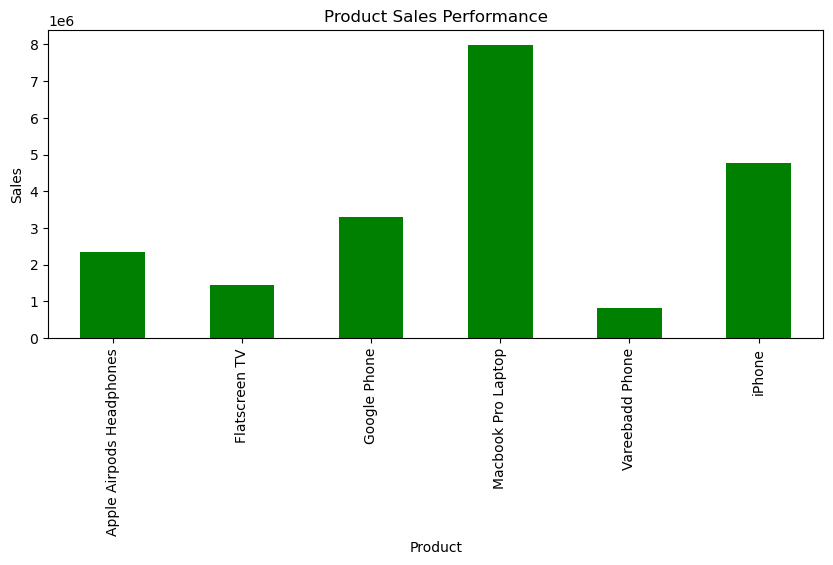

In [ ]:
# Visualize the chart
# Visualize the trend
plt.figure(figsize=(10,4))
per.plot(kind='bar', color='green', label='Quantity Ordered')
par.plot(kind='bar', color='red', label='Amount')
plt.title('Product Sales Performance')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()


`City with The Highest Revenue`

In [91]:
# Sales by city
city = df.groupby(['City','Product']) ['Amount'].sum().unstack()
city

Product,Apple Airpods Headphones,Flatscreen TV,Google Phone,Macbook Pro Laptop,Vareebadd Phone,iPhone
City,,,,,,
Atlanta,188400.0,121500.0,269400.0,640900.0,69200.0,380800.0
Austin,132000.0,71700.0,161400.0,425000.0,42800.0,260400.0
Boston,246300.0,165000.0,354000.0,812600.0,85600.0,525000.0
Dallas,177750.0,125400.0,274800.0,646000.0,70400.0,359800.0
Los Angeles,368100.0,216600.0,504600.0,1264800.0,126000.0,777700.0
New York City,312150.0,187800.0,451800.0,1111800.0,112000.0,614600.0
Portland,163200.0,93000.0,211800.0,569500.0,49600.0,312900.0
San Francisco,555600.0,344700.0,808800.0,1924400.0,196400.0,1156400.0
Seattle,187200.0,112200.0,259800.0,600100.0,71600.0,378700.0


<Figure size 2000x400 with 0 Axes>

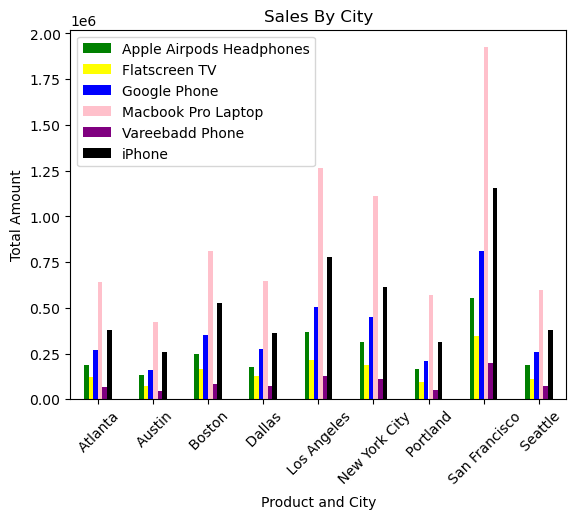

In [94]:
# Visualize the chart
# Visualize the trend
plt.figure(figsize=(20,4))
city.plot(kind='bar', color=['green', 'yellow', 'blue', 'pink', 'purple','black'], stacked=False)
plt.title('Sales By City')
plt.xlabel('Product and City')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()


`Key Performance Indicators`

In [97]:
# Measure KPIs
Total_Products = df['Product'].nunique()
No_of_City = df['City'].nunique()
Quantity_Ordered = df['Quantity Ordered'].sum()
Revenue = df['Amount'].sum()

In [98]:
# Print output
print('Total_Products', Total_Products, sep=":")
print('No_of_City', No_of_City, sep=":")
print('Quantity_Ordered', Quantity_Ordered, sep=":")
print('Revenue', Revenue, sep=":")

Total_Products:6
No_of_City:9
Quantity_Ordered:39396
Revenue:20650000.0
